## Polinômio de Taylor
### Tn(x) = $\sum_{k=0}^{n} \frac{f^n(a)(x-a)^n}{n!}$

In [2]:
using Plots
using LinearAlgebra

Algumas funções foram definidas antes de seus testes no intuito de facilitar a resolução de problemas anteriores. 

In [3]:
function taylor_ordem_zero(x,a,f_a, m)
    # Dado um valor de x, um valor de a,f(a), e o maior valor 
    #que f'(t) assume no intervalo [a,x], retorna um y e um E tal que
    #|y - f(x)|<= E
    #No caso, o erro máximo com a aproximação usada é dado por
    #M * (x-a)
     y =  f_a  # (f(a) * (x-a)^0)/0!
     E = m*(x-a)
    return (y,E)
    
end

taylor_ordem_zero (generic function with 1 method)

In [4]:
#exemplo 1: f(x) = x^2 + 2x + 1;  f'(x) = 2x +2
a =1
x = 1.5
f_x = x^2 + 2*x + 1  #valor correto de f(x)
f_a = a^2 + 2*a + 1 #f(a) = 4
m = 2*1.5 + 2 #valor maximo da derivada entre 1 e 1.5
y,E = taylor_ordem_zero(x,a,f_a,m)

(4, 2.5)

In [5]:
abs(y - f_x) #espera-se que y - f(x) seja menor ou igual a 2.5

2.25

In [6]:
function taylor_ordem_um(x,a,f_a, f_linha_a, m)
    # Dado um valor de x, um valor de a,f(a),f'(a), e o maior valor 
    #que f''(t) assume no intervalo [a,x], retorna um y e um E tal que
    #|y - f(x)|<= E
    #No caso, o erro máximo com a aproximação usada é dado por
    #(M * (x-a)^2)/2
     y =  f_a + f_linha_a*(x-a) #(f(a)*(x-a)^0)/0! + (f'(a)*(x-a)^1)/1! 
     E = (m*(x-a)^2)/2  
    return (y,E)
    
end

taylor_ordem_um (generic function with 1 method)

In [7]:
#exemplo 1: f(x) = x^2 + 2x + 1;  f'(x) = 2x +2; f'' = 2
a =1
x = 1.5
f_x = x^2 + 2*x + 1  #valor correto de f(x)
f_a = a^2 + 2*a + 1 #f(a) = 4
f_linha_a = 2*a + 2
m = 2
y,E = taylor_ordem_um(x,a,f_a,f_linha_a,m)

(6.0, 0.25)

In [8]:
abs(y - f_x) #espera-se que y - f(x) seja menor ou igual a 0.25

0.25

In [9]:
function taylor_ordem_dois(x,a,f_a, f_linha_a,f_duas_linhas_a, m)
    # Dado um valor de x, um valor de a,f(a),f'(a),f''(a), e o maior valor 
    #que f'''(t) assume no intervalo [a,x], retorna um y e um E tal que
    #|y - f(x)|<= E
    #No caso, o erro máximo com a aproximação usada é dado por
    #(M * (x-a)^3)/3!
     y =  f_a + f_linha_a*(x-a) + (f_duas_linhas_a*(x-a)^2)/2 #(f(a)*(x-a)^0)/0! + (f'(a)*(x-a)^1)/1!
                                                              # + (f''(a)*(x-a)^2)/2!
     E = (m*(x-a)^3)/6  #(M * (x-a)^3)/3!    
    return (y,E)
    
end

taylor_ordem_dois (generic function with 1 method)

In [10]:
#exemplo 1: f(x) = x^2 + 2x + 1;  f'(x) = 2x +2; f'' = 2; f'''(x) = 0
a =1
x = 1.5
f_x = x^2 + 2*x + 1  #valor correto de f(x)
f_a = a^2 + 2*a + 1 #f(a) = 4
f_linha_a = 2*a + 2
f_duas_linhas_a = 2
m = 0 #como f'''(x) = 0, esperamos nenhum erro!!
y,E = taylor_ordem_dois(x,a,f_a,f_linha_a,f_duas_linhas_a,m)

(6.25, 0.0)

In [11]:
f_x  

6.25

In [12]:
function taylor_ordem_n(x,a,derivadas, m, ordem)
    #entradas: x, a, informações sobre f(a) e as derivadas em a,
    #e o maior valor da derivada f^(ordem+1)(t) no intervalo [a,x]
    #saída: y e E, onde
    #(especificação): |y - f(x)|<= E
    #y é o somatorio de k=0 até k=ordem de (f^(k)(a) * (x-a)^k )/k!, onde
    #f^(k)(a) é a k-ésima derivada
    #O erro E é dado por:
    # (m *(x-a)^(ordem+1))(ordem+1)!
    y = 0
    E = 1   #E = (m*(x-a)^(ordem+1))/(ordem+1)!
    quociente = 1 #é a parte do ((x-a)^k)/k!
    for k=1:ordem
        E*= (x-a)/(k) #calculando o erro por partes para evitar overflow
        y += derivadas[k]*quociente  #f^k(a)* ((x-a)^k)/k! 
        
        quociente *= (x-a)/k #atualizando o quociente por partes para evitar overflow
         
    end
    
    E *= m*((x-a)/(ordem+1))
    return (y,E)
end

taylor_ordem_n (generic function with 1 method)

In [13]:
#exemplo 1: f(x) = x^2 + 2x + 1;  f'(x) = 2x +2; f'' = 2; f'''(x) = 0
a =1
x = 1.5
f_x = x^2 + 2*x + 1  #valor correto de f(x)
f_a = a^2 + 2*a + 1 #f(a) = 4
f_linha_a = 2*a + 2
f_duas_linhas_a = 2
m = 0 #como f'''(x) = 0, esperamos nenhum erro!!
y,E = taylor_ordem_n(x,a,[f_a,f_linha_a,f_duas_linhas_a],m,2)

(6.0, 0.0)

In [14]:
#exemplo 2: seno To-Do!!!!

In [15]:
#exemplo 3: e^x To-Do!!!!

## Encontrando raiz aproximadamente
### 1 - Método da bisseção

In [16]:
function bissecao(f,a,b,erro) 
#especificação: dado a e b tal que f(a) e f(b) tem sinais opostos 
#retorna x_final tal que |x_final - x_c| <= erro com f(x_c)=0 
    
    if é_raiz(f,a)  
        return a
    end
    if é_raiz(f,b)
        return b
    end
    if !(tem_sinais_opostos(f,a,b))
        return "Não tem sinais opostos"   
    end
    
    iterações = ceil(log2((b-a)/erro))-1   #isso porque o intervalo cai pela metade a cada iteração 
    for i=1:iterações
        m=média(a,b)
        if é_raiz(f,m)
            return m
        end
        
        if tem_sinais_opostos(f,a,m)
            b=m
        else
            a=m
        end
    end
    
    x_final=média(a,b)
    return x_final
end

bissecao (generic function with 1 method)

In [17]:
#exemplos: ToDo!!!

### 2 - Método de Newton

In [18]:
function newton(f, derivada, chute, n_de_iteracoes) #recebe uma função, sua derivada, um chute inicial e o
    #número de iterações.
    #Aplica o método de newton à função recebida:
    #X_n+1 = f(X_n)/f'(X_n)
    #. Se por ventura achamos uma raiz, a retornamos
    
    
    for i=1:n_de_iteracoes
        if (f(chute) == 0) #significa que já temos a raiz
          return chute
        end
        
        chute = chute - (f(chute)/(derivada(chute)) ) #Efetivamente o método de newton
    end
    
    return chute
end

newton (generic function with 1 method)

In [19]:
#exemplos: ToDo!!!!

## Interpolação polinomial
### 1- Lagrange

In [20]:
function lagrange(X,Y)
    #entrada: um vetor de valores de x, e um vetor de valores de y, que
    #representam os pontos (Xi, Yi) = (X[i], Y[i])
    #saída: um polinômio L(x) de grau n-1
    #especificação: para todo i entre 1 e n, L(X[i]) = Y[i]
    # 'n' é o número de pontos
    n = length(X)
    function L(x) #note que aqui o x é minúsculo, é apenas um número
        #a formula geral é 
        #L(x) = [y1 * ((x-x2)*(x-x3)*...*(x-xn))/(x1 - x2)*(x1-x3)*...*(x1-xn) ]  +
        #[y2 * ((x-x1)*(x-x3)*...*(x-xn))/(x2 - x1)*(x2-x3)*...*(x2-xn) ]+...+
        #[yn * ((x-x1)*(x-x2)*...*(x-x(n-1))/(xn - x1)*(xn-x2)*...*(xn-x(n-1)) ]
        #note que no termo com y1, o x_i não aparece no numerador, e também 
        #não é subtraido do proprio x_i no denominador, porque o objetivo é que
        #L(x) = y_i * 1 + 0 + 0... = y_i quando x = x_i
        y = 0
        for i=1:n 
            termo = Y[i]
            for j=1:n
                if (j!=i) 
                    termo *= (x - X[j])/(X[i] - X[j])
                end
            end
            y += termo
        end
        return y    
    end
    
    return L
end

lagrange (generic function with 1 method)

In [21]:
#exemplo: f(x) = ax^2 + bx + c
function f(x)
    return x^2 + 3x + 1
end

X = [1,2,3]
Y = [f(1), f(2), f(3)]
polinomio = lagrange(X,Y)
resultado = [polinomio(1), polinomio(2), polinomio(3)]
print(Y)
print("\n", resultado)

[5, 11, 19]
[5.0, 11.0, 19.0]

In [22]:
#exemplo 2: ToDo!!!

In [23]:
#exemplo 3: ToDo!!!

### 2- Vandermonde

In [24]:
"""
Função que resolve e retorna Ax = b, quando A é uma matriz quadrada triangular superior.
Entradas: Matriz A, uma matriz quadrada triangular superior; Vetor B, uma matriz coluna.
Saídas: Vetor x, cujo elementos respeitam a equação Ax = b.
Complexidade: O(n^2)
"""
function resolve_triangular_superior(A, b)
    n = length(b) # Obtém o tamanho de b e armazena em n
    x = zeros(n) # Cria um vetor x de tamanho n
    for i = n:-1:1 # Faz i, que começa com valor n e diminui até 1
        x[i] = b[i] # Armazena em x_i o valor b_i
        for j = i+1:n # Dentro do for, faz o b_i menos o somatório de A_i,j * x_j, e armazenar em x_i,
                      # Com j que começa com valor i+1 e cresce até n
            x[i] = x[i] - (A[i,j]*x[j])
        end
        x[i] = x[i]/A[i, i] # Por fim, dividir o o x_i atual por A_i,i, e armazenar em x_i
    end
    return x # Retorna o vetor x
end

resolve_triangular_superior

In [25]:
"""
Função que resolve e retorna Ax = b, quando A é uma matriz quadrada triangular inferior.
Entradas: Matriz A, uma matriz quadrada triangular inferior; Vetor B, uma matriz coluna.
Saídas: Vetor x, cujo elementos respeitam a equação Ax = b.
Complexidade: O(n^2)
"""
function resolve_triangular_inferior(A, b)
    n = length(b) # Obtém o tamanho de b e armazena em n
    x = zeros(n) # Cria um vetor x de tamanho n
    for i = 1:n # Faz i, que começa com valor 1 e cresce até n
        x[i] = b[i] # Armazenda em x_i o valor b_i
        for j = 1:(i - 1)# Dentro do for, faz o b_i menos o somatório de A_i,j * x_j, e armazenar em x_i,
                         # Com j que começa com valor 1 e cresce até i - 1
            x[i] = x[i] - (A[i,j]*x[j])
        end
        
        x[i] = x[i]/A[i, i] # Por fim, dividir o o x_i atual por A_i,i, e armazenar em x_i
    end 
    return x # Retorna o vetor x
end

resolve_triangular_inferior

In [26]:
"""
Função que recebe uma matriz A e retorna duas matrizes: L, uma matriz quadrada triangular inferior,
e U, uma matriz quadrada triangular superior. Essas, quando multiplicadas, equivalem a A (L*U = A)
Entradas: Matriz A, uma matriz quadrada;
Saídas: Uma matriz quadrada triangular inferior, L; Uma matriz quadrada triangular superior, U.
Complexidade: O(n^3)
"""
function decomposicao_LU(A)
    n, = size(A) # Obtém o número de linhas e colunas em A e armazena em n
    L = zeros(n, n) # Cria uma matriz quadrada L de tamanho nxn vazia
    U = copy(A) # Copia a matriz A em U
    v = 0 # Variável auxiliar
    for i = 1:n # Preenche a diagonal principal da matriz L com o número 1
        L[i,i] = 1
    end
    for i = 1:(n - 1) # For que seleciona o 'pivo' para realiza a eliminação de Gauss, e formular valores de L
        pivo = U[i,i] # Salva o pivo retirado da matriz A
        for j = i + 1:n # Realiza o for, com j representando as linhas abaixo da linha do pivo, até n
            v = U[j, i]/pivo # Atualiza a variável auxiliar v para zerar os elementos em A de mesma coluna do pivo
            for k = 1:n # Realiza o for, passando por todos os itens da linha para realizar a eliminação gaussiana
                U[j,k] = U[j,k] - U[i,k]*(v) # Realiza a eliminação gaussiana, zerando sempre os elementos da coluna do pivo
            end
            L[j, i] = v # Armazena o valor calculado para a eliminação gaussiana 
        end
    end
    return L, U # Retorna L, como uma matriz quadrada triangular inferior,
                # e U, como uma matriz quadrada triangular superior
end

decomposicao_LU

In [27]:
"""
Função que recebe uma matriz A e retorna A invertida. 
(Utiliza o método A*A^(-1) = I <-> L*U*A^(-1) = I, onde temos U*A^(-1) = y)
Entradas: Matriz A, uma matriz quadrada;
Saídas: A_inv, Uma matriz quadrada que é a inversa de A.
Complexidade: O(n^3)
"""

function inversa_LU(A)
    L, U = decomposicao_LU(A)# 'Desmonta' a matriz A em duas matrizes, 
                           # L (quadrada triangular inferior) e U (quadrada triangular superior)
    n, = size(A) # Obtém o número de linhas e colunas em A e armazena em n
    y = zeros(n, n) # Cria uma matiz y, que será intermediária, e a preenche com zeros
    A_inv = zeros(n, n) # Cria a matriz que sera retornada, a inversa de A, e preenche com zeros
    ident = zeros(n, n) # Cria uma matriz identidade, e a preenche com zeros
    for i = 1:n # For para preencher a diagonal da matriz identidade com 1's
        ident[i,i] = 1
    end
    for i = 1:n # For que completa a matriz A invertida, das colunas 1 a n
        y[:,i] = resolve_triangular_inferior(L, ident[:,i]) # Resolve o triangular inferior com a coluna i da matriz identidade,
                                                            # no molde L*y_:,i = I_:,i
        A_inv[:, i] = resolve_triangular_superior(U, y[:,i])# Resolve o triangular superior com a coluna i da matriz y,
                                                            # no molde U*A_:,i = y_:,i
    end
    return A_inv # Retorna a matriz A invertida
end

inversa_LU (generic function with 1 method)

In [28]:
function vandermonde(x,y,grau) 
    #função auxiliar para afunção de interpolação/regressão
    #monta a matriz de vandermonde
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

vandermonde (generic function with 1 method)

In [29]:
function interpolacao_vandermonde(x,y)
    #entrada: n pontos (x_1,y_1)...(x_n,y_n).
    #saída: uma função f(x) de grau n-1
    #especificação: f(x_i) = y_i, para todo i, 1<=i<=n
    grau = length(x) - 1 #para interpolar n pontos precisamos de um polinômio de grau n-1
    V=vandermonde(x,y,grau)
    c = inversa_LU(V)*y
    n = length(x)
    function f(x)
        resultado = 0
        for i=1:n
            resultado += c[i]*(x^(i-1))
        end
        return resultado
    end
    
    return f
end

interpolacao_vandermonde (generic function with 1 method)

In [30]:
#exemplo 1: f(x) = ax^2 + bx + c
function f(x)
    return x^2 + 3x + 1
end

X = [1,2,3]
Y = [f(1), f(2), f(3)]
polinomio = interpolacao_vandermonde(X,Y)
resultado = [polinomio(1), polinomio(2), polinomio(3)]
print(Y)
print("\n", resultado)

[5, 11, 19]
[5.0, 11.0, 19.0]

In [31]:
#exemplo 2: ToDo!!!

In [32]:
#exemplo 3: ToDo!!

## Regressão Polinomial

In [33]:
function transposta(A)
    #função auxiliar
    #recebe uma matriz A e retorna sua transposta
    #transposta[j,i] = A[i,j]
    

    m = length(A[1, :]) #o numero de colunas é o tamanho do vetor que corresponde 
                        #a uma linha
    n = length(A[: , 1])
    
    trans = zeros(m,n) #m linhas, n colunas, porque é a transposta
    for i=1:n
        for j=1:m
            trans[j,i] = A[i,j]
        end
    end
    
    return trans
    
end

transposta (generic function with 1 method)

In [34]:
function minimos_quadrados(A, y)
    #Entrada: uma matriz A e um vetor y
    #saída: um vetor x
    #resolve aproximadamente o sistema linear Ax = y
    #a formula é dada por: 
    #(A^t)*A*x = (A^t)*y  => x = inv((A^t)*A))*((A^t)*y)  
    #(A^t é a transposta de A)
    #Podemos resolver com LU
    trans = transposta(A)
    m1 = trans*A
    m2 = trans*y
    x = inversa_LU(m1)*m2
    return x
    
end

minimos_quadrados (generic function with 1 method)

In [35]:
function regressão(x,y,grau) 
    V=vandermonde(x,y,grau)
    c = minimos_quadrados(V,y)
    #c=V\y #mínimos quadrados
    
    function f(x)
        resultado = 0
        for i=1:(grau+1)
            resultado += c[i]*(x^(i-1))
        end
        return resultado
    end
    
    return f
    
end

regressão (generic function with 1 method)

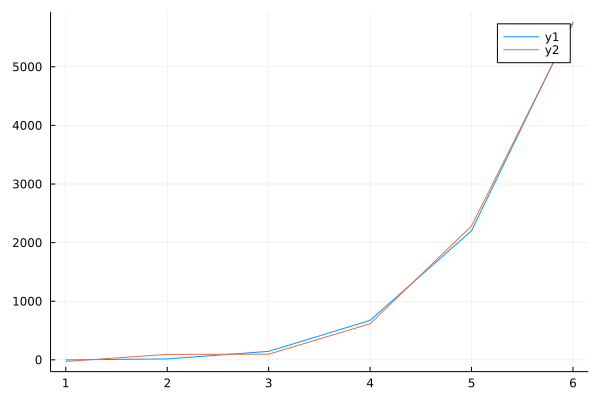

In [36]:
#exemplo 1: polinomio de grau 5 aproximado por grau 3
function grau_5(x)
    return x^5 - 2x^4 + 3x^3 - 2x^2 +x -2
end
x = [1,2,3,4,5,6]
y = [grau_5(1), grau_5(2), grau_5(3), grau_5(4), grau_5(5), grau_5(6)]
g = regressão(x,y,3)
y2 = [g(1), g(2), g(3), g(4), g(5), g(6)]
plot(x,y)
plot!(x,y2)

In [37]:
#exemplo 2: ToDo!!!


In [38]:
#exemplo 3: ToDo!!

## Regressão com coeficientes lineares


In [39]:
function vandermonde_funcoes(x,y,funcoes)
    #função auxiliar
    #monta a matriz de vandermonde, dessa vez com os diferentes f(x) na matriz,
    #que não precisam mais ser obrigatoriamente x^p 
    n,=size(y)
    V=zeros(n,length(funcoes))
    for i=1:n #linhas
        for j=1:length(funcoes)
            V[i,j]=funcoes[j](x[i]) #montando cada linha com f_1(x_i), f_2(x_i)...f_k(x_i)
        end
    end
    return V
end

vandermonde_funcoes (generic function with 1 method)

In [40]:
function regressão_coef_lineares(x,y,funcoes) 
    #entrada: um vetor x e um vetor y, representando n pontos (x[i], y[i]), e
    #um vetor de funções
    #saída: uma função f(x) = c1*funcoes[1](x) + c2*funcoes[2](x)...
    #...+ c_k*funcoes[k](x)
    #especificação: f(x[i]) ≈ y[i]
    V=vandermonde_funcoes(x,y,funcoes)
    c = minimos_quadrados(V,y)
    #c=V\y #mínimos quadrados
    
    function f(x)
        resultado = 0
        for i=1:length(funcoes)
            resultado += c[i]*(funcoes[i](x)) #f(x) = c1*f1(x) + c2*f2(x) ... + cn*fn(x)
        end
        return resultado
    end
    
    return f
    
end

regressão_coef_lineares (generic function with 1 method)

In [41]:
function regressão_coef_lineares_coeficientes(x,y,funcoes) #!!! mudar o nome?
    #entrada: um vetor x e um vetor y, representando n pontos (x[i], y[i]), e
    #um vetor de funções
    #saída: um vetor de números reais (coeficientes)
    #especificação: c[1]*funcoes[1](x[i]) + c[2]*funcoes[2](x[i])...
    #...+ c[k]*funcoes[k](x[i]) ≈ y[i]
    
    V=vandermonde_funcoes(x,y,funcoes)
    c = minimos_quadrados(V,y)
    #c=V\y #mínimos quadrados
    
    #function f(x)
     #   resultado = 0
      #  for i=1:length(funcoes)
       #     resultado += c[i]*(funcoes[i](x)) #f(x) = c1*f1(x) + c2*f2(x) ... + cn*fn(x)
        #end
        #return resultado
    #end
    
    #return f
    return c
end

regressão_coef_lineares_coeficientes (generic function with 1 method)

[244.5351364539756, 597.8823408231119, 22.599578894314675]

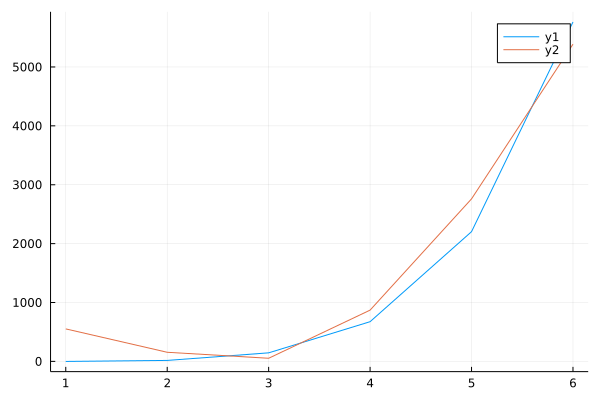

In [42]:
#exemplo: f(x) = c1*sen(x) +c2*cos(x) +c3*x^3
function seno(x)
    return sin(x)
end
function cosseno(x)
    return cos(x)
end

function potencia(x)
    return x^3
end
funcoes = [seno, cosseno, potencia]
x = [1,2,3,4,5,6]
Y = [13,4,9,11,-1,6]
c = regressão_coef_lineares_coeficientes(x,y,funcoes)
print(c)
funcao = regressão_coef_lineares(x,y,funcoes)
y2 = [funcao(i) for i in x]
plot(x,y)
plot!(x,y2)

## Regressão com coeficientes não-lineares
### 1 - Modelo exponencial

In [43]:
function regressao_exponencial(x,y)
    #entrada: um vetor x e um vetor y, representando n pontos (x[i], y[i])
    #saida: uma função na forma f(x) = c1*e^(c2x)
    #especificação: f(x[i]) ≈ y[i]
    
    #dicionario : c1_barra = ln(c1)
    #c2_barra = c2
    #yi_barra = ln(y_i)
    #se y = c1*e^(c2*x), ln(y) = ln(c1) + c2*x
    #vamos usar minimos quadrados para determinar c1_barra e c2_barra, usando y_barra, isto é:
    #[1 x1
    #1  x2  * [c1_barra, c2_barra] = [y1_barra, y2_barra, ...]
    # ...]
    #depois, basta fazer e^(c1_barra) para obter c1
    
    #montando a matriz de vandermonde
    vandermonde = ones(length(x),2)
    y_barra = []
    for i=1:length(x)
        vandermonde[i,2] = x[i]
        #aproveitando pra montar o vetor y_barra
        push!(y_barra, log(y[i]))
    end
    
    #resolvendo aproximadamente o sistema
    c_barra = minimos_quadrados(vandermonde, y_barra)
    c = [exp(c_barra[1]), c_barra[2]] #transformando de volta
    #fazendo a função
    function f(x)
        return c[1]*exp(c[2]*x)
    end
    return f
end
    

regressao_exponencial (generic function with 1 method)

In [44]:
function regressao_exponencial_coef(x,y)
    #entrada: um vetor x e um vetor y, representando n pontos (x[i], y[i])
    #saida: coeficientes c1 e c2 de uma função na forma f(x) = c1*e^(c2x)
    #especificação: f(x[i]) ≈ y[i]
    
    #dicionario : c1_barra = ln(c1)
    #c2_barra = c2
    #yi_barra = ln(y_i)
    #se y = c1*e^(c2*x), ln(y) = ln(c1) + c2*x
    #vamos usar minimos quadrados para determinar c1_barra e c2_barra, usando y_barra, isto é:
    #[1 x1
    #1  x2  * [c1_barra, c2_barra] = [y1_barra, y2_barra, ...]
    # ...]
    #depois, basta fazer e^(c1_barra) para obter c1
    
    #montando a matriz de vandermonde
    vandermonde = ones(length(x),2)
    y_barra = []
    for i=1:length(x)
        vandermonde[i,2] = x[i]
        #aproveitando pra montar o vetor y_barra
        push!(y_barra, log(y[i]))
    end
    
    #resolvendo aproximadamente o sistema
    c_barra = minimos_quadrados(vandermonde, y_barra)
    c = [exp(c_barra[1]), c_barra[2]] #transformando de volta
    
    return c
end

regressao_exponencial_coef (generic function with 1 method)

[1.0, 1.0]

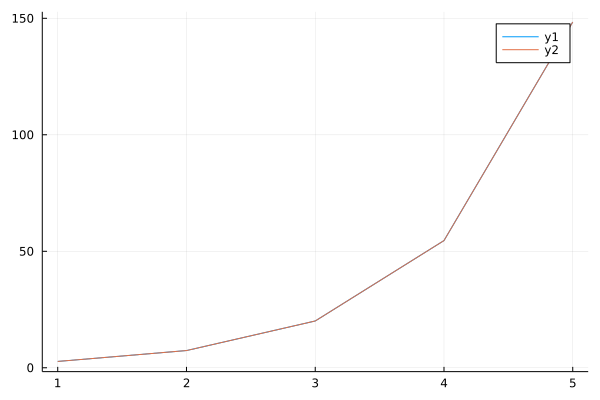

In [45]:
#exemplo1: "sanity check": a própria função exponencial
x = [1,2,3,4,5]
y = [exp(i) for i in x]
h = regressao_exponencial(x,y)
c = regressao_exponencial_coef(x,y)
print(c) #deveria ser [1,1]
y2 = [h(i) for i in x]
plot(x,y)
plot!(x,y2) #não deveríamos conseguir distinguir os dois no plot

### 2 - Potência

In [46]:
#ToDo!!!

### 3 - Geométrica

## Interpolação 2D

Pela geometria do problema, podemos definir 4 triplas. São elas
$$
(x_0,y_0,z_{00})\\
(x_1,y_0,z_{10})\\
(x_0,y_1,z_{01})\\
(x_1,y_1,z_{11})
$$
Dessa forma, precisamos que 
$$
F(x_i,y_j) = z_{ij}
$$
O algoritmo abaixo calcula exatamente isso. A diferença entre este método e a interpolação por lagrange em 1D, é que aqui multiplicamos os termos pelos fatores
$$
\frac{y-y_i}{y_j-y_i}
$$
devido a nova variável. 

In [101]:
"""
    interpolacao2d(x0,x1,y0,y1,z00,z10,z01,z11)
Recebe os valores x_i,y_j e z_ij que devem obedecem a lei de formação F(x_i,y_j) = z_ij. 
A função F interpoladora é retornada
"""
function interpolacao2d(x0,x1,y0,y1,z00,z10,z01,z11)
    F(x,y) = z00*(((x-x1)*(y-y1))/((x0-x1)*(y0-y1))) + z10*(((x-x0)*(y-y1))/((x1-x0)*(y0-y1))) + z01*(((x-x1)*(y-y0))/((x0-x1)*(y1-y0))) + z11*(((x-x0)*(y-y0))/((x1-x0)*(y1-y0)))
    return F
end

interpolacao2d

Aqui testamos se os índices foram utilizados corretamente.

In [98]:
x0 = 1
y0 = 1

x1 = 2
y1 = 2

z00 = 5
z10 = 7
z01 = 8
z11 = 10

p = interpolacao2d(x0,x1,y0,y1,z00,z10,z01,z11)
z00 ≈ p(x0,y0) && z10 ≈ p(x1,y0) && z01 ≈ p(x0,y1) && z11 ≈ p(x1,y1)

true

Aqui testamos com uma função $f$. Verificamos se $p=f$ nos pontos dados.

In [110]:
f(x,y) = x*y 

x0 = 50
y0 = -99

x1 = 100
y1 = -4

z00 = f(x0,y0)
z10 = f(x1,y0)
z01 = f(x0,y1)
z11 = f(x1,y1)

p = interpolacao2d(x0,x1,y0,y1,z00,z10,z01,z11)
f(x0,y0) ≈ p(x0,y0) && f(x1,y0) ≈ p(x1,y0) && f(x0,y1) ≈ p(x0,y1) && f(x1,y1) ≈ p(x1,y1)

true

In [178]:
f(x,y) = 3*x*y + sqrt(2)*x + 5*y + 1

x0 = 2
y0 = -2

x1 = 4
y1 = -4

z00 = f(x0,y0)
z10 = f(x1,y0)
z01 = f(x0,y1)
z11 = f(x1,y1)

p = interpolacao2d(x0,x1,y0,y1,z00,z10,z01,z11)
f(x0,y0) ≈ p(x0,y0) && f(x1,y0) ≈ p(x1,y0) && f(x0,y1) ≈ p(x0,y1) && f(x1,y1) ≈ p(x1,y1)

true

## Norma de um vetor v

A norma de um vetor $v$ pode ser calculada como
$$
\|v\| = \sqrt{
v^tv
}
$$
onde $v$ é uma matriz coluna.

In [51]:
"""
    norma(v)
Retorna a norma do vetor v de entrada. 
"""
function norma(v)
    return sqrt(v'*v)
end

norma (generic function with 1 method)

In [52]:
# A norma de um vetor unitário é 1
v = [1;0]
norma(v) ≈ 1

true

In [53]:
v = [3;4]
norma(v) ≈ 5

true

In [54]:
# A norma do vetor nulo é 0
v = [0;0]
norma(v) ≈ 0

true

## Resolver um sistema linear denso aproximadamente

O método de mínimos quadrados pode ser utilizado para calcular a média aritmética de $n$ valores.

In [168]:
A = [1;1;1;1;1;1]
b = [10; 15; 20; 79; 100; -10]

x = minimos_quadrados(A,b) 
media = (10+15+20+79+100-10)/6
x[1] ≈ media

true

Vamos resolver o sistema de teste
\begin{align*}
2x + y &= 6\\
x + y &= 10\\
x + y &= 11\\
\end{align*}
ou seja, precisamos minimizar a função
$$
F(x,y) = \left(6-\left(2x+y\right)\right)^2+\left(10-\left(x+y\right)\right)^2+\left(11-\left(x+y\right)\right)^2
$$
O gradiente será
\begin{align*}
F_x &= 12x+8y-66\\
F_y &= 8x+6y-54\\
\end{align*}
Igualando o gradiente igual a 0, formamos o sistema
\begin{align*}
12x+8y &= 66\\
8x+6y &= 54\\
\end{align*}
Então o método de mínimos quadrados deve retornar o mesmo vetor resultado do sistema acima.

In [171]:
# Sistema teste
A1 = [2 1;
1 1;
1 1]
b1 = [6; 10; 11]

# Sistema feito pelo método de mínimos quadrados realizado na força bruta
A2 = [12 8;
8 6]
b2 = [66; 54]

minimos_quadrados(A1,b1) ≈ resolve(A2,b2)

true

Vamos resolver o sistema de teste
\begin{align*}
x + 2y + z &= 10\\
3x + y + 4z &= 3\\
5x + y + \frac{z}{2} &= 7\\
7x + 2y + z &= 0\\
\end{align*}
ou seja, precisamos minimizar a função
$$
F(x,y,z) = \left(10-\left(x+2y+z\right)\right)^2+\left(3-\left(3x+y+4z\right)\right)^2+\left(7-\left(5x+y+\frac{z}{2}\right)\right)^2+\left(0-\left(7x+2y+z\right)\right)^2
$$
O gradiente será
\begin{align*}
F_x &= 3(56x+16y+15z-36)\\
F_y &= 48x+20y+17z-60\\
F_z &= \frac{90x+34y+73z-102}{2}\
\end{align*}
Igualando o gradiente igual a 0, formamos o sistema
\begin{align*}
56x+16y+15z &= 36\\
48x+20y+17z &= 60\\
90x+34y+73z &= 102\
\end{align*}
Então o método de mínimos quadrados deve retornar o mesmo vetor resultado do sistema acima.

In [167]:
# Sistema teste
A1 = [1 2 1;
3 1 4;
5 1 1/2;
7 2 1]
b1 = [10; 3; 7; 0]

# Sistema feito pelo método de mínimos quadrados realizado na força bruta
A2 = [56 16 15;
48 20 17;
90 34 73]
b2 = [36; 60; 102]

minimos_quadrados(A1,b1) ≈ resolve(A2,b2)

true

## Resolver exatamente uma sistema linear denso

A função *resolve* soluciona o sistema $Ax=b$ através de decomposição LU, onde A é uma matriz $nxn$. Isso pode ser feito através dos passos
\begin{align*}
Ax&=b\\
LUx&=b\\
LY&=b &\text{onde } Y &= Ux\\
UX &= Y
\end{align*}
Dessa forma $X$ é o vetor coluna que procuramos.

In [164]:
"""
    resolve(A,b)
    
Retorna a matriz coluna x que é o resultado do sistema linear Ax=b, onde
A é uma matriz nxn e b possui tamanho nx1.
"""
function resolve(A,b)
    # Força todos os valores a matriz A serem float
    A = 1.0*A
    L,U = decomposicao_LU(A)
    Y = resolve_triangular_inferior(L,b)
    return resolve_triangular_superior(U,Y)
end

resolve

Aqui geramos a matriz $A$ e $b$ randomicamente.

In [114]:
n = 3
A = rand(n,n)
b = randn(n)
x = resolve(A,b)
A*x ≈ b

true

In [115]:
n = 10
A = rand(n,n)
b = randn(n)
x = resolve(A,b)
A*x ≈ b

true

In [116]:
n = 30
A = rand(n,n)
b = randn(n)
x = resolve(A,b)
A*x ≈ b

true

## Resolver um sistema triangular superior
Utilizamos a função [UpperTriangular](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.UpperTriangular) para gerar a matriz A triangular superior.

In [62]:
n = 3
A = UpperTriangular(rand(n,n))
b = randn(n)
x = resolve_triangular_superior(A,b)
A*x ≈ b

true

In [63]:
n = 10
A = UpperTriangular(rand(n,n))
b = randn(n)
x = resolve_triangular_superior(A,b)
A*x ≈ b

true

In [64]:
n = 30
A = UpperTriangular(rand(n,n))
b = randn(n)
x = resolve_triangular_superior(A,b)
A*x ≈ b

true

## Resolver um sistema triangular inferior
Utilizamos a função [LowerTriangular](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.LowerTriangular) para gerar a matriz A triangular inferior.

In [172]:
n = 3
A = LowerTriangular(rand(n,n))
b = randn(n)
x = resolve_triangular_inferior(A,b)
A*x ≈ b

true

In [173]:
n = 10
A = LowerTriangular(rand(n,n))
b = randn(n)
x = resolve_triangular_inferior(A,b)
A*x ≈ b

true

In [174]:
n = 30
A = LowerTriangular(rand(n,n))
b = randn(n)
x = resolve_triangular_inferior(A,b)
A*x ≈ b

true

## Resolver um sistema diagonal

In [68]:
"""
    resolve_diagonal(A,b)
    
Retorna a matriz coluna x que é o resultado do sistema linear diagonal Ax=b.
A é uma matriz diagonal nxn e b nx1.
"""
function resolve_diagonal(A, b)
    # Computa n, que será o número de linhas da matriz x
    n = length(b)
    x = zeros(n)
    # Computa o vetor x
    for i=1:n
        x[i] = b[i] / A[i,i]
    end
    return x
end

resolve_diagonal

A matriz identidade $I$ concedida pela biblioteca LinearAlgebra foi usada para gerar as matrizes diagonais.

In [120]:
n = 3
A = randn()*I
b = randn(n)
x = resolve_diagonal(A,b)
A*x ≈ b

true

In [121]:
n = 19
A = randn()*I
b = randn(n)
x = resolve_diagonal(A,b)
A*x ≈ b

true

In [122]:
n = 57
A = randn()*I
b = randn(n)
x = resolve_diagonal(A,b)
A*x ≈ b

true

## Achar a inversa de uma matriz

Aqui tbm geramos as matrizes randomicamente

In [175]:
n = 3
A = randn(n,n)
A_inv = inversa_LU(A)
Ident = Matrix{Float64}(I,n,n)
A*A_inv ≈ A_inv*A ≈ Ident

true

In [176]:
n = 11
A = randn(n,n)
A_inv = inversa_LU(A)
Ident = Matrix{Float64}(I,n,n)
A*A_inv ≈ A_inv*A ≈ Ident

true

In [177]:
n = 37
A = randn(n,n)
A_inv = inversa_LU(A)
Ident = Matrix{Float64}(I,n,n)
A*A_inv ≈ A_inv*A ≈ Ident

true